In [21]:
from data_loader import torch_dataset_loader
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from config import PARAS
from mel_dealer import mel_converter
import torch
import librosa
import torch

In [32]:
test_loader = torch_dataset_loader(PARAS.DATASET_PATH + 'test.h5', PARAS.BATCH_SIZE, False, PARAS.kwargs)
path = '../Pics/'

In [178]:
for index, data_item in enumerate(test_loader):
    if index == 9 :
        break

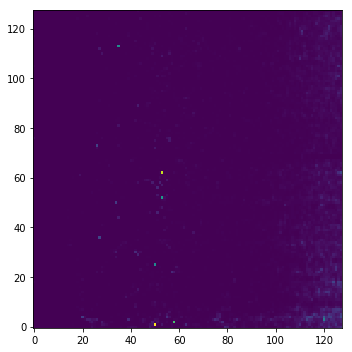

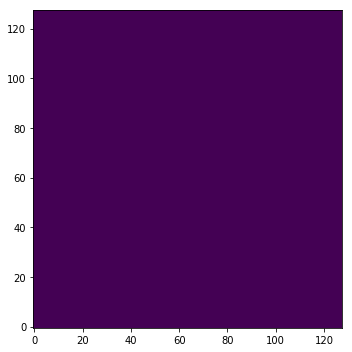

In [179]:
plt.figure(figsize=(5, 5))
plt.imshow(data_item['scale_mask'][1], aspect='auto', origin='lower')
plt.tight_layout()
plt.savefig(path + 'scale_mask.png')
plt.show()
plt.figure(figsize=(5, 5))
plt.imshow(data_item['binary_mask'][1], aspect='auto', origin='lower')
plt.tight_layout()
plt.savefig(path + 'binary_mask.png')
plt.show()

In [180]:
from music_decoder import VocalExtractor
from hybrid_model import H_model
from cluster_model import D_model
from unet_model import UNet, UNetEnhanced

ve_hd = VocalExtractor(H_model, 'HD_MODEL.pt', 'cluster')
ve_cd = VocalExtractor(D_model, 'DC_MODEL.pt', 'cluster')
U_model = UNet()
UH_model = UNetEnhanced('HD_model.pt')
ve_unet = VocalExtractor(U_model, 'UNET_MODEL.pt', 'mask')
ve_uhnet = VocalExtractor(UH_model, 'UHNET_MODEL.pt', 'mask')

In [181]:
mask_hd = ve_hd.get_cluster_out(data_item['mix'][1])
mask_cd, mask_cd_r = ve_cd.get_simple_cluster_out(data_item['mix'][1])

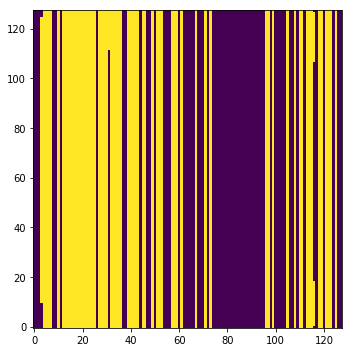

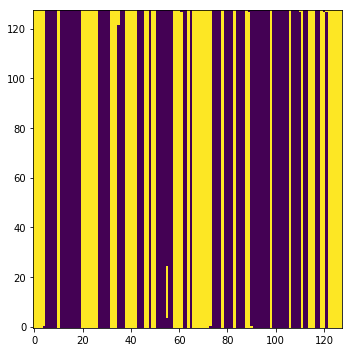

In [188]:
plt.figure(figsize=(5, 5))
plt.imshow(mask_hd, aspect='auto', origin='lower')
plt.savefig(path + 'hc_mask.png')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(mask_cd_r, aspect='auto', origin='lower')
plt.savefig(path + 'dc_mask.png')
plt.tight_layout()
plt.show()

In [183]:
mask_uhnet = ve_uhnet.get_unet_out(data_item['mix'][1])
mask_unet = ve_unet.get_unet_out(data_item['mix'][1])

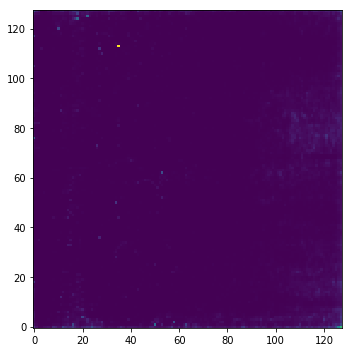

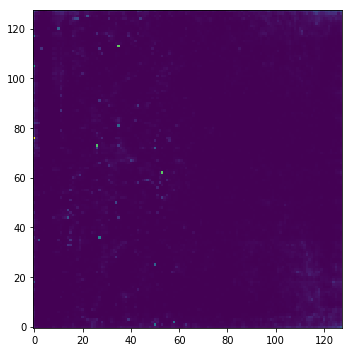

In [184]:
plt.figure(figsize=(5, 5))
plt.imshow(mask_uhnet, aspect='auto', origin='lower')
plt.savefig(path + 'uhnet_mask.png')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(mask_unet, aspect='auto', origin='lower')
plt.savefig(path + 'unet_mask.png')
plt.tight_layout()
plt.show()

In [185]:
mix_power = librosa.db_to_power(data_item['mix'][1].numpy())
vocal_power = librosa.db_to_power(data_item['vocal'][1].numpy())
unet_power = mix_power * mask_unet
uhnet_power = mix_power * mask_uhnet
dc_power = mix_power * mask_cd_r
hd_power = mix_power * mask_hd

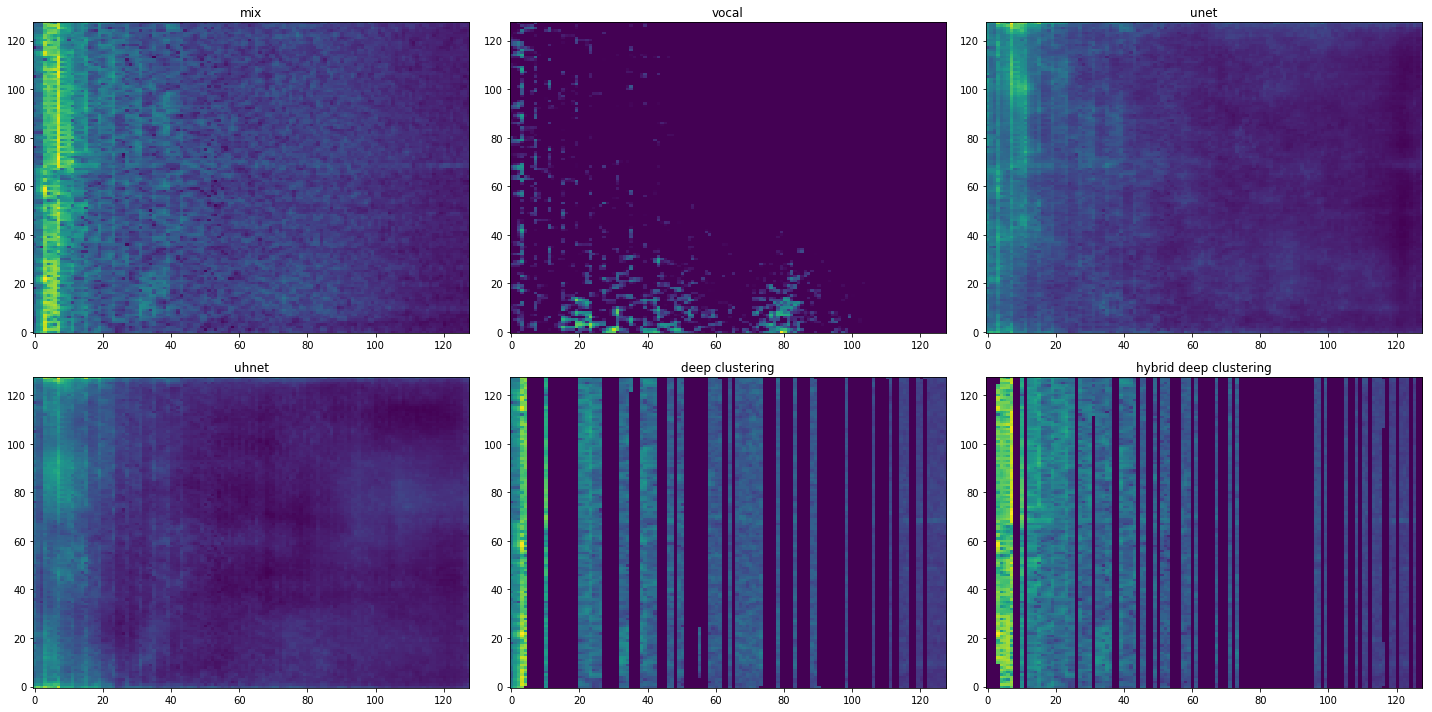

In [192]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(mix_power ** 0.15, aspect='auto', origin='lower', label="mix")
plt.title('mix')
plt.subplot(2, 3, 2)
plt.imshow(vocal_power ** 0.15, aspect='auto', origin='lower', label="mix")
plt.title('vocal')
plt.subplot(2, 3, 3)
plt.imshow(unet_power ** 0.15, aspect='auto', origin='lower', label="unet")
plt.title('unet')
plt.subplot(2, 3, 4)
plt.imshow(uhnet_power ** 0.15, aspect='auto', origin='lower', label="uhnet")
plt.title('uhnet')
plt.subplot(2, 3, 5)
plt.imshow(dc_power ** 0.15, aspect='auto', origin='lower', label="uhnet")
plt.title('deep clustering')
plt.subplot(2, 3, 6)
plt.imshow(hd_power ** 0.15, aspect='auto', origin='lower', label="uhnet")
plt.title('hybrid deep clustering')
plt.tight_layout()
plt.savefig(path + 'final_mask.png')
plt.show()

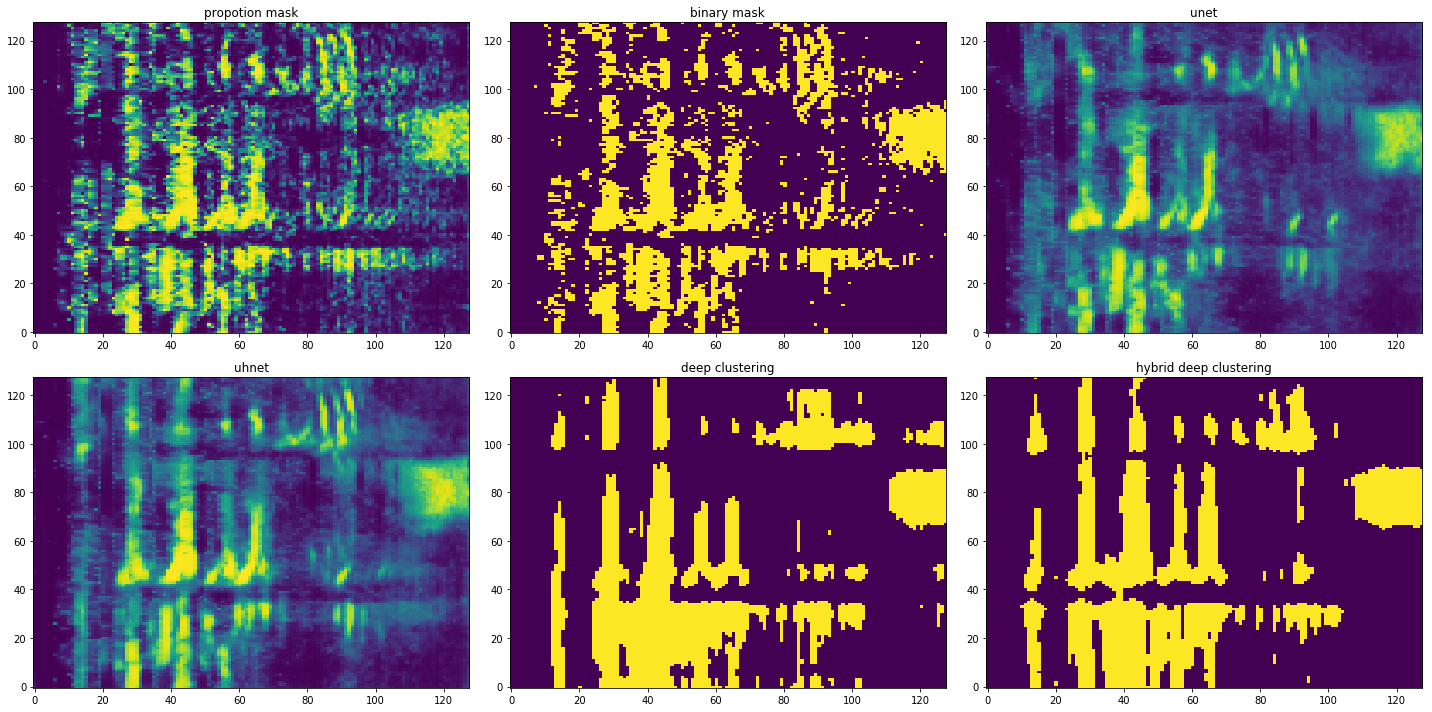

In [206]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(data_item['scale_mask'][1].numpy(), aspect='auto', origin='lower', label="mix")
plt.title('propotion mask')
plt.subplot(2, 3, 2)
plt.imshow(data_item['binary_mask'][1].numpy(), aspect='auto', origin='lower', label="mix")
plt.title('binary mask')
plt.subplot(2, 3, 3)
plt.imshow(mask_unet, aspect='auto', origin='lower', label="unet")
plt.title('unet')
plt.subplot(2, 3, 4)
plt.imshow(mask_uhnet, aspect='auto', origin='lower', label="uhnet")
plt.title('uhnet')
plt.subplot(2, 3, 5)
plt.imshow(mask_cd_r, aspect='auto', origin='lower', label="uhnet")
plt.title('deep clustering')
plt.subplot(2, 3, 6)
plt.imshow(mask_hd, aspect='auto', origin='lower', label="uhnet")
plt.title('hybrid deep clustering')
plt.tight_layout()
plt.savefig(path + 'final_empty_mask.png')
plt.show()